# En los ultimos 30 años han disminuido las emisiones de Co2 mundialmente ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
sklearn.__version__

'1.0.2'

# Introducción

# Contexto 

Durante los últimos 30 años, las emisiones de dióxido de carbono (CO2) a nivel mundial han seguido aumentando de manera constante. Según el Informe de Evaluación Global del Cambio Climático de 2021, elaborado por el Grupo Intergubernamental de Expertos sobre el Cambio Climático (IPCC), las emisiones globales de CO2 aumentaron en un promedio anual del 1.5% entre 2010 y 2019.

El informe también señala que las emisiones de gases de efecto invernadero (GEI) de origen humano son la principal causa del calentamiento global observado en las últimas décadas. Desde la Revolución Industrial, las emisiones de GEI se han incrementado significativamente debido al uso de combustibles fósiles como el petróleo, el gas y el carbón, así como a la deforestación y la agricultura intensiva.

El aumento en las emisiones de CO2 ha llevado a un aumento en la temperatura global promedio, lo que ha provocado una serie de impactos en el clima, como el aumento del nivel del mar, la acidificación de los océanos y el aumento de eventos climáticos extremos como huracanes, sequías e inundaciones.

Para combatir este problema, muchos países han implementado medidas para reducir las emisiones de GEI, como la promoción de fuentes de energía renovable, la mejora de la eficiencia energética y la adopción de prácticas agrícolas más sostenibles. Sin embargo, a pesar de estos esfuerzos, la reducción de las emisiones globales de GEI sigue siendo un desafío importante.

# Contexto analítico

Se proporciona un archivo CSV (almacenado en GitHub) que contiene detalles sobre cada emision de Co2 a nivel de cada pais en el mundo

1) Se extraen los datos a partir de un archivo CSV
2) Se leen y transforman los mimsos y se preparan los datos para su visualización
3) Se procede a realizar un análisis y a construir visualizaciones de los datos para identificar patrones en el conjunto de datos

Para el presente trabajo se extrajo información de emisiones de Co2 a nivel mundial.

Estos datos fueron extraídos de Kaggle. El Dataset presente consiste en emisiones de Co2 en medida (metricon) per cápita por caída país alrededor del mundo. Estos datos fueron recolectados a través desde World Data Bank.

***Links:***

https://data.worldbank.org/indicator/EN.ATM.CO2E.PC

https://www.kaggle.com/datasets/koustavghosh149/co2-emission-around-the-world

# Hipótesis

Se analizaran y se realizaran graficas a fin de que nos briden información fidedigna y valiosa, para de esta manera poder respondernos; si las emisiones de Co2 han disminuido con el paso del tiempo hasta nuestros días, y cuáles son los piases donde hay una mayor tendencia a lo largo del tiempo a tener mayores niveles de contaminación.

***Obtencion de datos relevantes***

Los datos se almacenan en un archivo CSV, en el cual mediante librerias en cojunto con Python nos seran de grana ayuda para otener los mismos



***De que manera se obtienen los datos ?***

In [2]:
url='/Users/user/Downloads/SegundaEntregaCoder/GCB2022v27_MtCO2_flat.csv'
df=pd.read_csv('/Users/user/Downloads/SegundaEntregaCoder/GCB2022v27_MtCO2_flat.csv')

Se obtienen los datos mediante la funcion df=pd.read_csv llamando a la URL que es la ruta donde se encuentra alojado nuestro CSV

***OVERVIEW de la data*** :

Analizamos lo que nos devuelve el dataFrame con las funcion df.head y analizamos las columnas con la funcion df.columns

Utilizamos la funcion drpona() para eliminar los datos nulos

In [3]:
df=df.dropna()


Con la funcion isna().sum() nos cersioramos de que se haya cumplido con la eliminacion de datos nulos

In [4]:
df.isna().sum()

Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64

In [5]:
df.head(3)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
3232,Australia,AUS,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938
3233,Australia,AUS,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
3234,Australia,AUS,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502


In [6]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

***Tenemos las siguientes columnas***

Country: El nombre del pais. (String)

ISO 3166-1 alpha-3: El codigo de tres letras para el pais. (String)

Year: El año del dato. (Integer)

Total: El total de emisiones de Co2 para dicho pais en el el año dado. (Float)

Coal: El monto total de emisiones de Co2 de carbon para el pais en el año dado. (Float)

Oil: El monto total de emisiones de Co2 de petroleo para el pais en el año dado. (Float)

Gas: El monto total de emisiones de Co2 de gas para el pais en el año dado. (Float)

Cement: El monto total de emisiones de Co2 de cemento para el pais en el año dado. (Float)

Flaring: El monto total de emisiones de Co2 de antorcha para el pais en el año dado. (Float)

Other: El monto total de emisiones de Co2 de otras elementos para el pais en el año dado. (Float)

Per Capita: El monto total de emisiones de Co2 de Per Capita para el pais en el año dado. (Float)

# Analisis EDA

***PREGUNTAS A ANALIZAR***

Que paises son los mayores emisores de Co2 ?

Cuáles son los cinco países con mayores emisiones de CO2 en los últimos 35 años ?

Cuáles son las principales fuentes de emisiones de CO2 en cada uno de estos países ?

Cuál es la tendencia de las emisiones de CO2 en estos países en los últimos años ?

Cuál es la cantidad de CO2 emitido por sector (transporte, energía, industria, etc) ?


***GRAFICA TOP 5 PAISES DE MAYORES EMISIONES DE Co2***

# Analisis univariado

Realizamos un analisis univariado en el cual graficamos los 5 principales paises emisores de Co2 y un dato global del total de contaminacion de los anteriormente mencionados paises 

<AxesSubplot:>

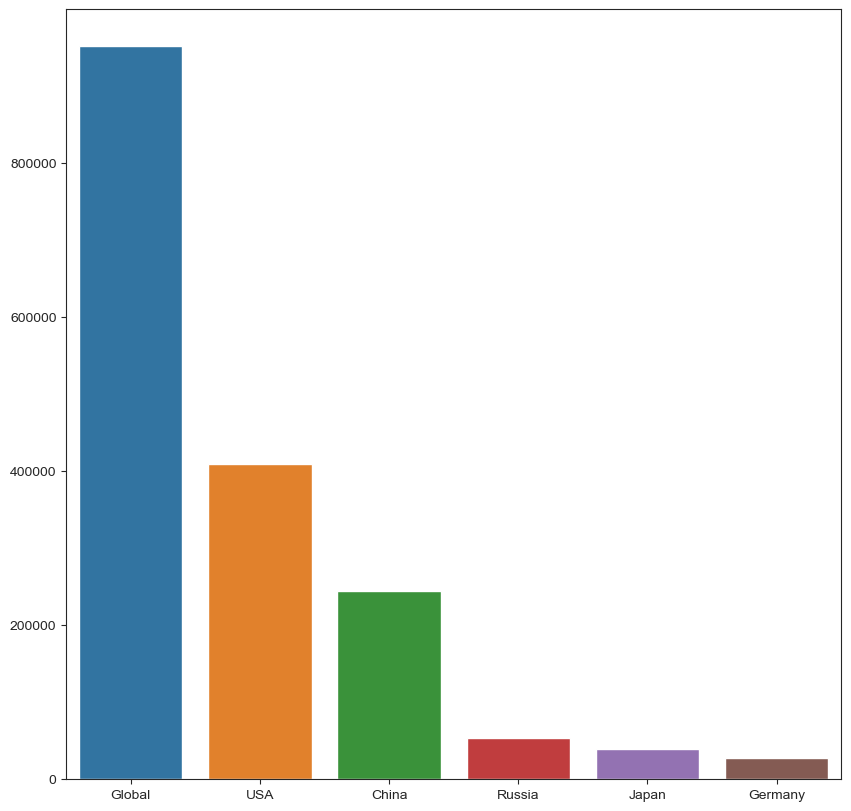

In [7]:
paises=list(df.groupby('Country').sum().sort_values(by='Total', ascending=False).index) 
valores=list(df.groupby('Country').sum().sort_values(by='Total', ascending=False)['Total']) 
plt.figure(figsize=(10,10)) 
sns.set_style('ticks')
sns.barplot(x=paises[:6],y= valores[:6])

# Analisis Vibariado

***Procederemos a graficar las emisiones de los TOP 5 paises del dataframe a lo largo de 35 años de manera individual, al finalizar con un grafico de lineas graficaremos a los 5 paises para esta manera poder visualizar de mejor manera de que manera se diferencian entre si en sus emisiones***

***GRAFICOS DE BARRAS***

<AxesSubplot:xlabel='Year', ylabel='Total'>

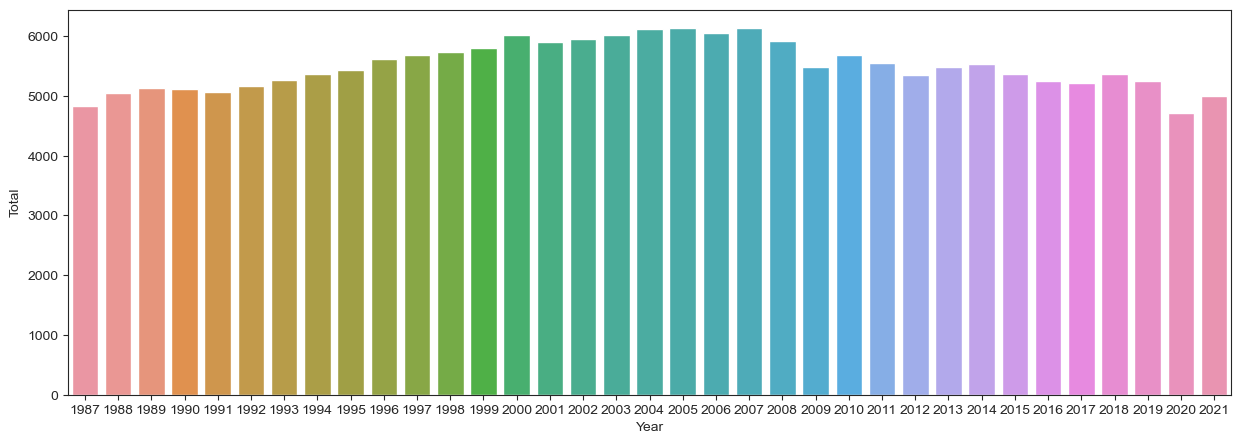

In [8]:
usa = df[df['Country']=='USA']
USA_data = usa[-35:]
plt.figure(figsize=(15,5))
sns.barplot(x='Year',y='Total',data=USA_data)


RESUMEN NUMERICO

En la siguiente grafica podemos apreciar en el eje (Y) los valores de contaminacion (metricon) per capita y en el eje (X) podemos observar un grafico de barras el cual nos expone la suba o baja de contaminacion en el periodo de años (1987-2021) para el pais de Estados Unidos¶

<AxesSubplot:xlabel='Year', ylabel='Total'>

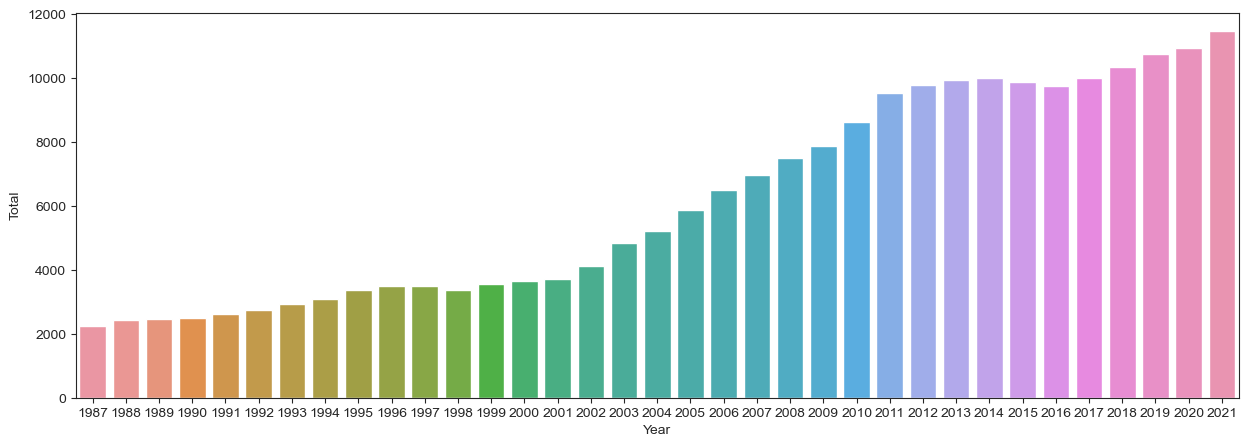

In [9]:
china = df[df['Country']=='China']
China_data = china[-35:]
plt.figure(figsize=(15,5))
sns.barplot(x='Year',y='Total',data=China_data)

RESUMEN NUMERICO

En la siguiente grafica podemos apreciar en el eje (Y) los valores de contaminacion (metricon) per capita y en el eje (X) podemos observar un grafico de barras el cual nos expone la suba o baja de contaminacion en el periodo de años (1987-2021) para el pais de China

<AxesSubplot:xlabel='Year', ylabel='Total'>

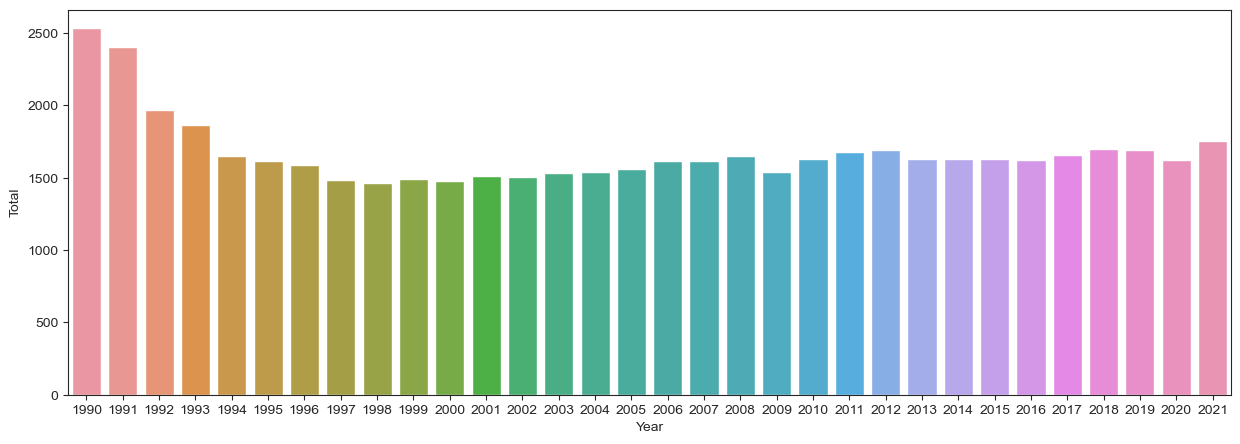

In [10]:
russia = df[df['Country']=='Russia']
Russia_data = russia[-35:]
plt.figure(figsize=(15,5))
sns.barplot(x='Year',y='Total',data=Russia_data)

RESUMEN NUMERICO

En la siguiente grafica podemos apreciar en el eje (Y) los valores de contaminacion (metricon) per capita y en el eje (X) podemos observar un grafico de barras el cual nos expone la suba o baja de contaminacion en el periodo de años (1987-2021) para el pais de Russia¶

<AxesSubplot:xlabel='Year', ylabel='Total'>

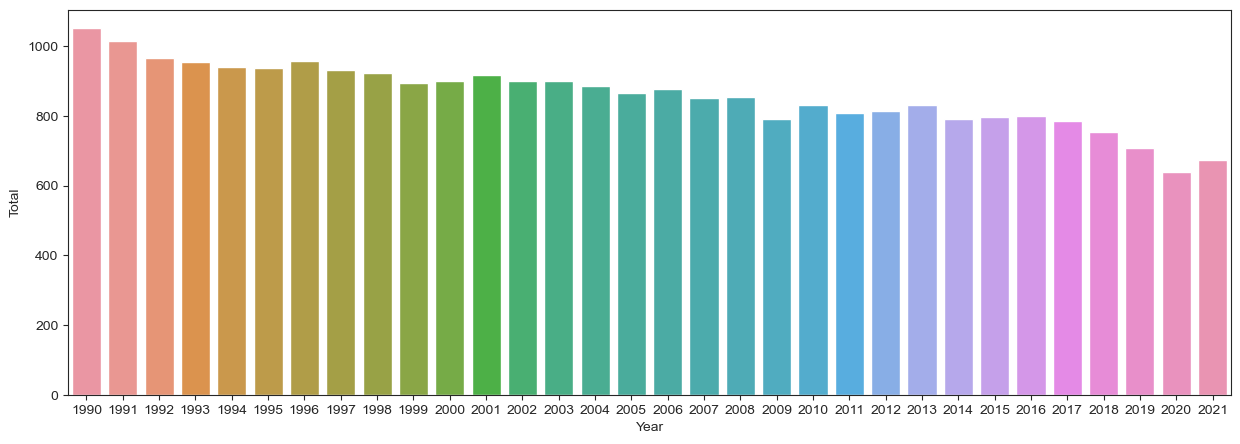

In [11]:
germany = df[df['Country']=='Germany']
Germany_data = germany[-35:]
plt.figure(figsize=(15,5))
sns.barplot(x='Year',y='Total',data=Germany_data)

RESUMEN NUMERICO

En la siguiente grafica podemos apreciar en el eje (Y) los valores de contaminacion (metricon) per capita y en el eje (X) podemos observar un grafico de barras el cual nos expone la suba o baja de contaminacion en el periodo de años (1987-2021) para el pais de Alemania¶

<AxesSubplot:xlabel='Year', ylabel='Total'>

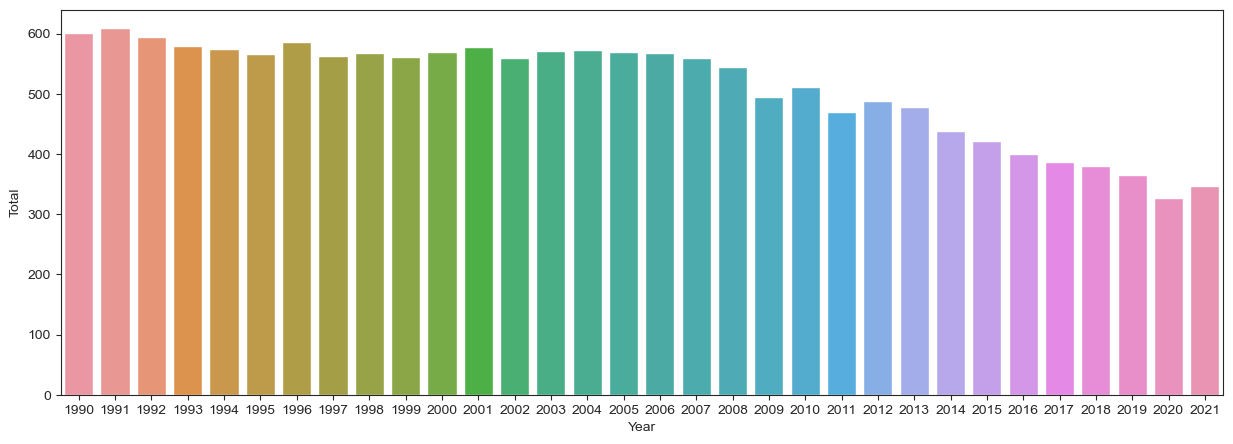

In [12]:
unitedKingdom = df[df['Country']=='United Kingdom']
unitedKingdom_data = unitedKingdom[-35:]
plt.figure(figsize=(15,5))
sns.barplot(x='Year', y='Total', data=unitedKingdom_data)

En la siguiente grafica podemos apreciar en el eje (Y) los valores de contaminacion (metricon) per capita y en el eje (X) podemos observar un grafico de barras el cual nos expone la suba o baja de contaminacion en el periodo de años (1987-2021) para los paises de Reino Unido

***GRAFICAS LINEALES***

***Guia de colores***

Naranja: Estados Unidos

Azul: China

Russia: Verde 

Alemania: Rojo

Reino Unido: Violeta

<AxesSubplot:xlabel='Year', ylabel='Total'>

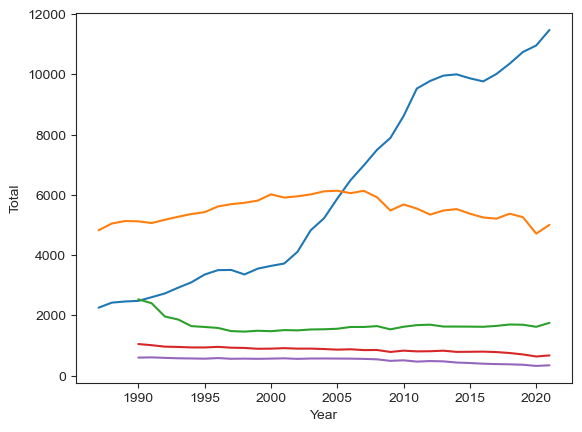

In [13]:
sns.lineplot(x='Year',y='Total',data=China_data)
sns.lineplot(x='Year',y='Total',data=USA_data)
sns.lineplot(x='Year',y='Total',data=Russia_data)
sns.lineplot(x='Year',y='Total',data=Germany_data)
sns.lineplot(x='Year',y='Total',data=unitedKingdom_data)




# Conclusion

En el siguiente grafico podemos observar detalladamente la comparativa entre paises en un mismo grafico en base a sus emisiones de Co2.
Podemos observar que China presenta una tendecia en la suba de sus emisiones, tambien podemos observar que Estados Unidos presenta una tendencia a mantenerse sobre un mismo margen presentando una leve bajada pero es el pais que mas contaminacion presenta.
Russia es uno de los paises tambien emisores de Co2 donde se puede apreciar una tendencia a bajar y un leve pico hacia el año 2020.
Alemania al igual que Reino Unido Presentan de similar manera sus emisiones, siendo menores las emsiones en Reino Unido.

En 2019 en millones de toneladas métricas (Mt) para los países mencionados fue:

China: 10,175.38 Mt
Estados Unidos: 5,416.01 Mt
Alemania: 729.41 Mt
Reino Unido: 354.45 Mt
Rusia: 1,668.77 Mt
Por lo tanto, en términos de emisiones absolutas de CO2, China y Estados Unidos son los mayores emisores, seguidos por Rusia, Alemania y el Reino Unido.

Sin embargo, cuando se consideran las emisiones per cápita, es decir, las emisiones por persona, la clasificación es diferente. Según datos del Banco Mundial para 2019, la emisión de CO2 per cápita en toneladas métricas (t) para los países mencionados fue:

China: 7.08 t
Estados Unidos: 16.24 t
Alemania: 8.69 t
Reino Unido: 5.25 t
Rusia: 11.54 t
En términos de emisiones per cápita, Estados Unidos es el mayor emisor, seguido por Rusia, Alemania, China y el Reino Unido. Cabe señalar que, en general, los países con mayor desarrollo económico tienden a tener mayores emisiones per cápita.

Es importante recordar que la emisión de CO2 no es el único factor relevante para evaluar la huella de carbono de un país o región, ya que hay otros gases de efecto invernadero y otros factores ambientales a considerar. Además, es importante tener en cuenta el tamaño de la población y la economía de cada país.


# Comenzamos a aplicar IA

Primeramente nos encargamos que los datos que posean valores numericos, en este caso binarios con la funcion get_dummies

In [14]:
df=pd.get_dummies(df, columns=['ISO 3166-1 alpha-3'], drop_first=True)
df=pd.get_dummies(df, columns=['Country'], drop_first=True)

Separamos los datos de entrenamientos que en este caso es el Total

In [15]:
X = df.drop('Total', axis=1)       # feature matrix
y = df['Total']               # target feature
df.head()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,ISO 3166-1 alpha-3_AUT,...,Country_Slovenia,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_Taiwan,Country_Turkey,Country_USA,Country_Ukraine,Country_United Kingdom
3232,1990,278.154156,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938,0,...,0,0,0,0,0,0,0,0,0,0
3233,1991,279.528510,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767,0,...,0,0,0,0,0,0,0,0,0,0
3234,1992,284.525345,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502,0,...,0,0,0,0,0,0,0,0,0,0
3235,1993,288.870537,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765,0,...,0,0,0,0,0,0,0,0,0,0
3236,1994,293.696553,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706,0,...,0,0,0,0,0,0,0,0,0,0


Procedemos a analizar el eje X e y para ver que nos devuelven y cumplimos con nuestro objetivo de apartar en el eje y a "Total"

In [16]:
X

,Year,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,ISO 3166-1 alpha-3_AUT,ISO 3166-1 alpha-3_BEL,...,Country_Slovenia,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_Taiwan,Country_Turkey,Country_USA,Country_Ukraine,Country_United Kingdom
3232,1990,141.879819,88.842090,34.454816,3.462872,7.272496,2.242063,16.315938,0,0,...,0,0,0,0,0,0,0,0,0,0
3233,1991,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767,0,0,...,0,0,0,0,0,0,0,0,0,0
3234,1992,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502,0,0,...,0,0,0,0,0,0,0,0,0,0
3235,1993,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765,0,0,...,0,0,0,0,0,0,0,0,0,0
3236,1994,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,2017,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682,0,0,...,0,0,0,0,0,0,0,0,0,0
63100,2018,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753,0,0,...,0,0,0,0,0,0,0,0,0,0
63101,2019,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633,0,0,...,0,0,0,0,0,0,0,0,0,0
63102,2020,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y

3232       278.154156
3233       279.528510
3234       284.525345
3235       288.870537
3236       293.696553
             ...     
63099    36096.739276
63100    36826.506600
63101    37082.558969
63102    35264.085734
63103    37123.850352
Name: Total, Length: 1619, dtype: float64

# Metodos

***Elegimos un metodo de regresion y un future selection, para este caso utilizamos los 3 metodos (forward_selection, backward_elimination y stepwise_selection)***

***Forward Selecton***

In [18]:
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype='float64', index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [19]:
forward_selection(X,y)

['Country_Global',
 'Coal',
 'ISO 3166-1 alpha-3_WLD',
 'Gas',
 'Oil',
 'Cement',
 'Other',
 'Flaring']

***Backward Elimination***

In [20]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [21]:
backward_elimination(X,y)

['Coal',
 'Oil',
 'Gas',
 'Cement',
 'Flaring',
 'Other',
 'ISO 3166-1 alpha-3_CYP',
 'ISO 3166-1 alpha-3_DEU',
 'ISO 3166-1 alpha-3_DNK',
 'ISO 3166-1 alpha-3_ESP',
 'ISO 3166-1 alpha-3_NLD',
 'Country_Cyprus',
 'Country_Denmark',
 'Country_Germany',
 'Country_Netherlands',
 'Country_Spain']

***Stepwise Selection***

In [22]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype='float64', index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [23]:
stepwise_selection(X,y)

['Coal',
 'Gas',
 'Oil',
 'Cement',
 'Other',
 'Flaring',
 'ISO 3166-1 alpha-3_NLD',
 'Country_Netherlands',
 'Country_Cyprus',
 'Country_Denmark',
 'ISO 3166-1 alpha-3_CYP',
 'ISO 3166-1 alpha-3_DNK',
 'Country_Germany',
 'ISO 3166-1 alpha-3_DEU',
 'ISO 3166-1 alpha-3_ESP',
 'Country_Spain']

# Metricas

In [24]:
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm
import sys
import joblib
import warnings
warnings.filterwarnings("ignore")

sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
 

In [27]:
sfs1=SFS(LinearRegression(),
         k_features=5,
         forward=True,
         floating=False,
         scoring='r2',
         cv=2)

sfs1.fit(X_train,y_train)
df1=df[list(sfs1.k_feature_names_)]
df1

,Coal,Oil,Gas,Cement,Flaring
3232,141.879819,88.842090,34.454816,3.462872,7.272496
3233,146.082840,88.245572,32.786243,3.183033,7.001201
3234,150.051381,87.916828,33.970472,2.923411,7.303701
3235,150.098575,90.386578,35.670002,3.004698,7.136743
3236,151.376241,91.924087,37.032005,3.484276,6.880148
...,...,...,...,...,...
63099,14506.973805,12242.627935,7144.928128,1507.923185,391.992176
63100,14746.830688,12266.016285,7529.846784,1569.218392,412.115746
63101,14725.978025,12345.653374,7647.528220,1617.506786,439.253991
63102,14174.564010,11191.808551,7556.290283,1637.537532,407.583673


In [28]:
sfs1.k_feature_names_

('Coal', 'Oil', 'Gas', 'Cement', 'Flaring')

In [29]:
X = df[['Coal',
 'Oil',
 'Gas',
 'Cement',
 'Flaring']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test)

In [33]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 3.1212385083989505


In [34]:
print("R2",r2_score(y_test,y_pred))

R2 0.9999974218528245


***R2 se Aproxima bastante bien a 1 por lo indica que el modelo esta bien***